In [1]:
#This program classifies clothes from the fashion MNIST dataset using ANN

In [2]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Image label is: 3


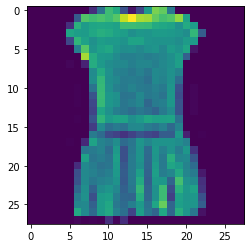

In [4]:
#View a training image
img_index = 3
img = train_images[img_index]
print('Image label is: {}'.format(train_labels[img_index]))
plt.imshow(img)

In [5]:
#Print the shape
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
#Reshape trainig and test images
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [7]:
#Create convulutions and model
model = keras.Sequential([
                          (keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1))),
                          (keras.layers.MaxPooling2D(2,2)),
                          (keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu)),
                          (keras.layers.MaxPooling2D(2,2)),
                          (keras.layers.Flatten()),
                          (keras.layers.Dense(128,activation=tf.nn.relu)),
                          (keras.layers.Dense(10,activation=tf.nn.softmax))
])

In [8]:
#Create the neural network model
#model = keras.Sequential([
#                          keras.layers.Flatten(input_shape=(28,28)),
#                          keras.layers.Dense(128,activation=tf.nn.relu),
#                          keras.layers.Dense(10, activation=tf.nn.softmax)
#])

In [9]:
#Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
#Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5832 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8776
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.8915
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.8985
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2485 - accuracy: 0.9064


In [11]:
#Evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3069 - accuracy: 0.8935


[0.30691635608673096, 0.8934999704360962]

In [12]:
#Make a prediction
predictions =model.predict(test_images[0:5])

#Print the predicted labels
print(predictions)

[[8.75276089e-13 6.79969525e-10 4.25564362e-10 1.51512036e-14
  4.25721380e-16 1.21059065e-05 3.29542085e-13 4.95554632e-05
  3.90627987e-13 9.99938369e-01]
 [7.65750556e-08 8.89247460e-15 9.99944687e-01 1.57821013e-11
  4.63070410e-06 3.52367268e-16 5.05616154e-05 3.45617422e-18
  7.07021830e-10 2.77488755e-20]
 [1.15360211e-18 1.00000000e+00 9.27786374e-21 3.18593190e-15
  1.17166383e-14 4.43522445e-30 1.59209624e-19 8.41185670e-23
  9.86626408e-27 1.33196859e-25]
 [1.10117443e-17 1.00000000e+00 5.51514466e-20 4.55959490e-17
  5.54970651e-15 9.82289414e-26 1.31107786e-18 1.17910957e-17
  3.59569387e-27 6.28022225e-24]
 [3.12944591e-01 3.21105035e-04 9.59189758e-02 1.37219364e-02
  7.62474677e-03 1.96363953e-06 5.34400463e-01 1.13422457e-05
  3.50547843e-02 1.17378072e-07]]


In [13]:
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [14]:
#Print the actual label values
print(test_labels[0:5])

[9 2 1 1 6]


In [16]:
#Reshape test images back to original
test_images=test_images.reshape(10000,28,28)

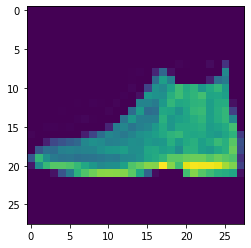

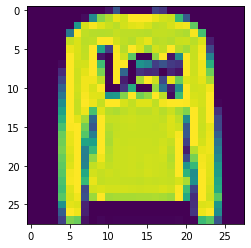

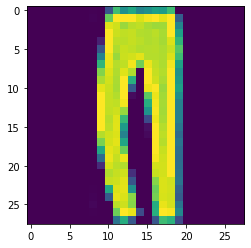

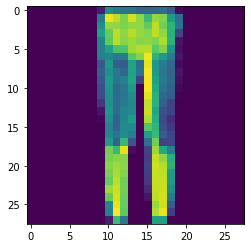

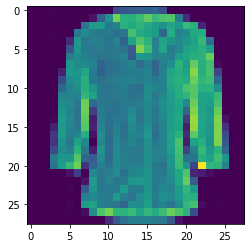

In [17]:
#Print the first 5 images
for i in range(0,5):
  plt.imshow(test_images[i])
  plt.show()

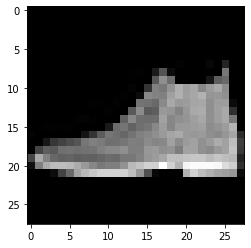

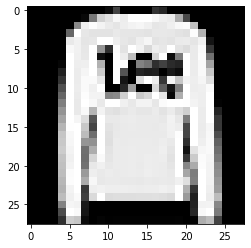

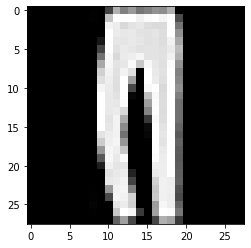

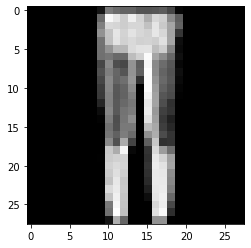

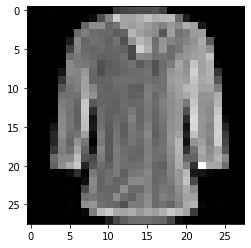

In [18]:
for i in range(0,5):
  first_image= test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(test_images[i], cmap='gray')
  plt.show()
